### Pichu/Pikachu Discriminator - Simplified Supervised ML Model (k-NN)

--- 

![](../../Images/_pikachu_pichu_banner.png)

Datapoints, __width__ and __height__, (features) categorized by __label__, are imported as raw data in the following format:

`(width (cm), height (cm), label (0-pichu, 1-pikachu))` <br>
`21.959384499160468, 31.23956701424158, 0` <br>
`23.63591632187622, 36.46821490673444, 1`

Test points are stored in the following format:

```
Test points:
1. (25, 32)
2. (24.2, 31.5)
3. (22, 34)
4. (20.5, 34)
```

The first task is to clean the data and store the data in the same format. Since it's 150 elements in the list, we don't want to do this manually.

---

# Cleaning datapoints

In [1]:
import pandas as pd
# Read and print index dtype, columns, non-null values and memory usage
df = pd.read_csv("../../Data/datapoints.txt")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   (width (cm)      150 non-null    float64
 1    height (cm)     150 non-null    float64
 2    label (0-pichu  150 non-null    int64  
 3    1-pikachu))     0 non-null      float64
dtypes: float64(3), int64(1)
memory usage: 4.8 KB


In [2]:
# from the info() method we learn third column has missing values, which resulted from pandas parsing

df = df.drop(df.columns[3], axis=1)            # drop third column
df.columns = ['width', 'height', 'label']      # rename columns
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
width,21.959384,23.635916,17.714056,21.780200,25.206306,19.332572,24.736457,23.792576,24.557613,20.191281
height,31.239567,36.468215,31.441704,33.213398,36.558816,32.253256,35.332912,38.103728,36.731444,35.069669
label,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000


# Exploration (EDA)

In [3]:
# summarize the central tendency for width and height
df.iloc[:,0:2].describe().T # slicing to remove 'label'


,count,mean,std,min,25%,50%,75%,max
width,150.0,22.062142,2.497307,16.866105,19.921975,22.040754,24.316733,27.194384
height,150.0,33.598281,2.159651,28.888134,32.005462,33.315877,35.320895,40.147170


In [4]:
# split into series to check central tendency for Pichu and Pikachu groups
pichu = df.groupby('label').get_group(0).drop(df.columns[2], axis=1)
pikachu = df.groupby('label').get_group(1).drop(df.columns[2], axis=1)

pichu.describe().T

,count,mean,std,min,25%,50%,75%,max
width,75.0,20.032374,1.449591,16.866105,19.165267,19.893039,20.777169,23.696747
height,75.0,31.948326,1.321757,28.888134,31.063293,32.029984,32.599105,35.403479


In [5]:
pikachu.describe().T

,count,mean,std,min,25%,50%,75%,max
width,75.0,24.091910,1.450786,20.216003,23.082920,24.385290,25.109727,27.194384
height,75.0,35.248236,1.458045,31.418268,34.268916,35.319182,36.175371,40.147170


In [6]:
from scipy.stats import ttest_ind

# t-test to compare the means of the two series
t_stat, p_val = ttest_ind(pichu, pikachu)

print('t-statistic: ', t_stat)
print('p-value: ', p_val)

t-statistic:  [-17.14223573 -14.52153948]
p-value:  [5.64644811e-37 2.90459420e-30]


The results suggest that there is a significant size difference between the means of the two groups, and that the difference is **very** unlikely to be due to chance alone.


<div style="background-color: #022020; border-radius: 26px; padding: 2px; margin: 2px">
<div style="display: flex; flex-direction: row;">
  <div style="flex: 1; margin: 20px;">
    <img src="https://i0.wp.com/eltallerdehector.com/wp-content/uploads/2022/06/d0a6b-pikachu-ball-png.png?resize=450%2C450&ssl=1">
  </div>

  <div style="flex: 5;">

<br>
<span style="font-size:2em; color:#f6f6f6";>About t-tests & p-values</span>

<p style="color: #f6f6f6;">The t-statistic is a measure of the difference between the means of the sizes of Pikachus and Pichus, standardized by the standard error of the difference.<br><br>In this case, the t-statistics are -17.14 and -14.52. A negative t-statistic suggests that the mean of the first group is lower than the mean of the second group.<br><br>The p-value is the probability of observing a t-statistic as extreme as the one computed, assuming that the null hypothesis is true. In this case, the p-values are very small, 5.65e-37 and 2.90e-30, indicating strong evidence against the null hypothesis. The null hypothesis typically states that there is no difference between the means of the two groups in the entire population.</p>
</span>    
  </div>
  <div style="flex: 1;">
  <br>
  </div>
</div>
</div>

# Plotting

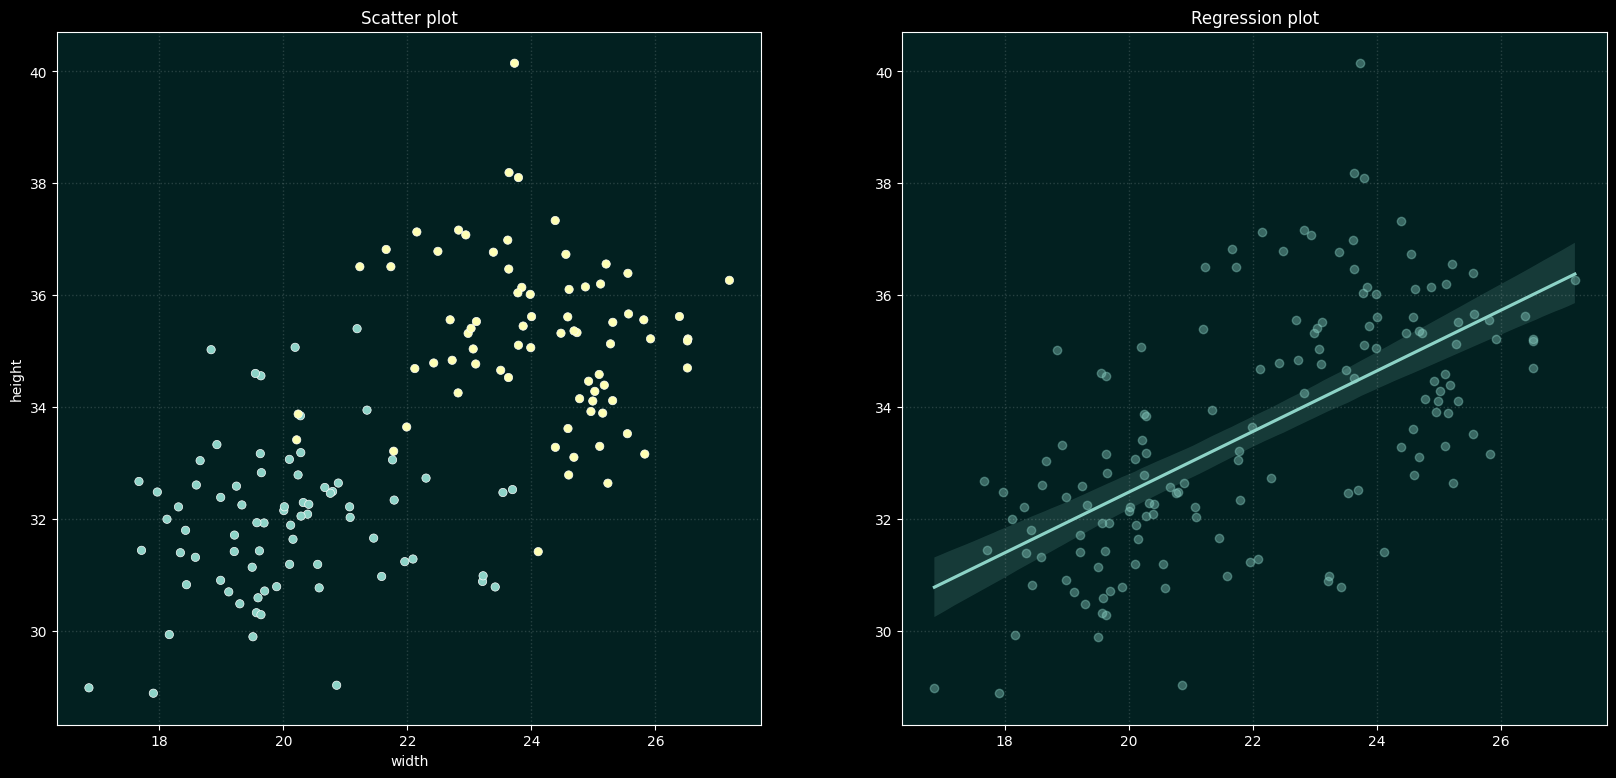

In [7]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

# styling and layout
rcParams['figure.figsize'] = 20,9              # set the fig size
plt.style.use('dark_background')               # boilerplate for black border
plt.rcParams['axes.facecolor'] = '#022020'     # hex color for plot backgrund
fig, axs = plt.subplots(ncols=2)               # create fig with two subplots

# Scatter plot
axs[0].set_title('Scatter plot')               # scatter plot title
sns.scatterplot(x=df['width'],                 # set x and y for scatter points
                y=df['height'],
                hue=df['label'],               # set color by label
                legend=False,                  # remove legend
                ax=axs[0],)                    # set ax

axs[0].grid(color='#FFFFFF',                   # grid display preferences
            linestyle=':',
            linewidth=1,
            alpha=0.15,)

# Regression plot
axs[1].set_title('Regression plot')
sns.regplot(data=df, 
            x="width",
            y="height",
            scatter_kws={"alpha":0.4},
            ax=axs[1],)

# Just to remove labels as we don't need them on both plots
axs[1].set_xlabel('') 
axs[1].set_ylabel('')

axs[1].grid(color='#FFFFFF',
            linestyle=':',
            linewidth=1,
            alpha=0.15)
plt.show()

Left plot visualises the size distribution from the DataFrame and contains no new information. It is however a neat way to quicker get an undestanding of the data. <br>

Right plot is a regplot, which fits a regression line to represent the expected value of the dependent variable (y) for a given value of the independent variable (x), assuming that there is a linear relationship between x and y. In other words, the line is a mathematical model that describes the relationship between the two variables.

Left plot visualises the size distribution from the DataFrame and contains no new information. It is however a neat way to quicker get an undestanding of the data. <br>

Right plot is a regplot, which fits a regression line to represent the expected value of the dependent variable (y) for a given value of the independent variable (x), assuming that there is a linear relationship between x and y. In other words, the line is a mathematical model that describes the relationship between the two variables.

<div style="background-color: #F6F6F6; padding: 2px; margin: 2px">
<div style="display: flex; flex-direction: row;">
  <div style="flex: 1.2; margin: 10px;">
    <img src="https://png.pngitem.com/pimgs/s/478-4780727_oak-transparent-professor-oak-png-png-download.png">
  </div>

  <div style="flex: 5;">

<br>
<span style="font-size:2em;color:#022020;">About lmplot and regplot in Seaborn</span><br>

<span style="color:#022020">
Both lmplot and regplot are great functions for creating regression plots. However, there are some differences between these two functions. lmplot is more flexible and powerful allowing a wider variety of regression plots with more customization options, while regplot is a simpler function that creates a basic scatter plot with a linear regression line.
<br>

- lmplot is a higher-level function that creates a FacetGrid object, which allows you to create multiple plots side by side based on one or more variables. Regplot is a lower-level function that creates a single plot, which is great for subplots, while FacetGrid in lmplot may cause errors in subplots.

- lmplot can be used to create different types of regression plots such as scatter plots, line plots, and bar plots. It also allows you to specify different parameters such as hue, col, and row for grouping variables. regplot, on the other hand, creates a scatter plot with a linear regression line, and thats it.

- lmplot provides more options for customizing the aesthetics of the plot such as changing the size and shape of the markers, adding titles and labels, and modifying the legend.
  </span>
  </div>
  <div style="flex: 0.5;">
  <br>
  </div>
  </div>
</div>

With seaborn it is **not possible to extract slopes or intercept** from either lmplot or regplot.<br>
A feature of this was requested back in 2015, to which the creator of seaborn replied:

<a href="https://github.com/mwaskom/seaborn/issues/655#issuecomment-125073496"><i>It is not available, and it will not be made available</i></a>, adding that statsmodule should be used instead.

In [8]:
import statsmodels.api as sm

y = df['height']            # dependent variable
X = df['width']             # independent variable
X = sm.add_constant(X)      # add constant to fit an intercept

model = sm.OLS(y, X).fit()  # Fit the Ordinary Least Square regression model

intercept = model.params[0]
slope = model.params[1]

intercept, slope

(21.643921014890037, 0.5418494602533789)

In [9]:
# y = mx + b, where m is the slope and b is the y-intercept
m, x, b = slope, df['width'], intercept
y = [m*x_val + b for x_val in x]

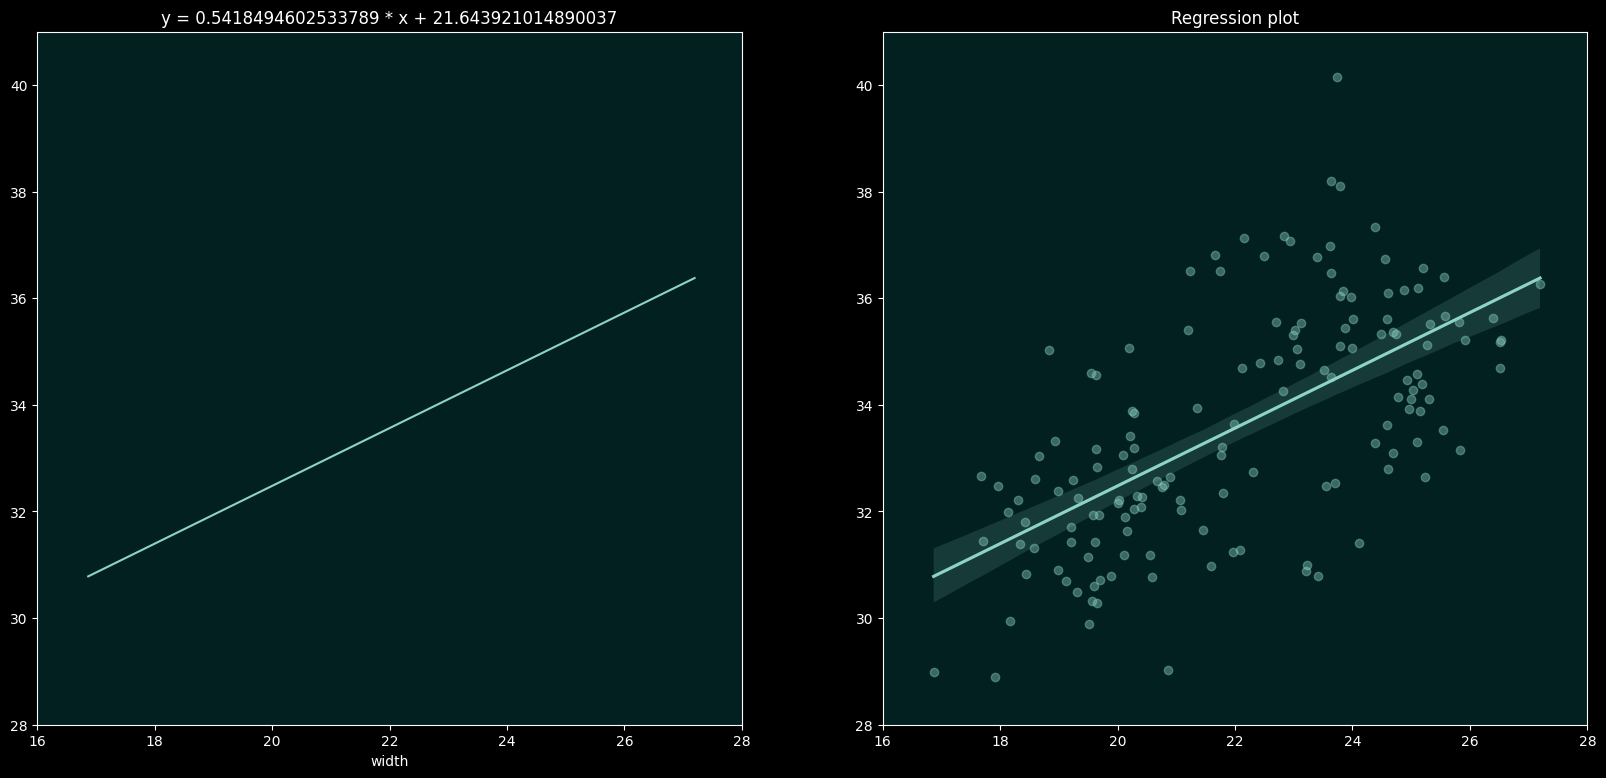

In [10]:
fig, axs = plt.subplots(ncols=2)

# Line created from values from 
axs[0].set_title(f'y = {m} * x + {b}')
sns.lineplot(x=x, y=y, ax=axs[0])

# Regression plot
axs[1].set_title('Regression plot')
sns.regplot(data=df, 
            x="width",
            y="height",
            scatter_kws={"alpha":0.4},
            ax=axs[1],)

axs[1].set_xlabel('')
axs[1].set_ylabel('')

# set limits to match previous regplot
for ax in axs:
    ax.set(xlim=(16, 28), ylim=(28, 41))

plt.show()

<div style="background-color: #000000; padding: 2px; margin: 2px">
  <p style="color: #f6f6f6;">Ok, well that was somewhat of a sidetrack just to get the regression parameters out of Seaborn. I think what I've learnt is that maybe it's better to start out with statsmodels before we start plotting. But maybe there's another way of doing it.</p>
</div>

In [11]:
# How to import txt or csv without pandas
file_path = "../../Data/testpoints.txt"
with open(file_path) as test_points:
        test_data_list = test_points.readlines()

type(test_data_list), test_data_list

(list,
 ['Test points:\n',
  '1. (25, 32)\n',
  '2. (24.2, 31.5)\n',
  '3. (22, 34)\n',
  '4. (20.5, 34)\n'])

In [12]:
#yikes, how messy, lets use regex to clean this up, there is a patterns to it:
import re

pattern = re.compile(r'\((\d+\.\d+|\d+), (\d+\.\d+|\d+)\)')

clean = [(float(match.group(1)), float(match.group(2))) for line in test_data_list if (match:=pattern.search(line))] 

clean

[(25.0, 32.0), (24.2, 31.5), (22.0, 34.0), (20.5, 34.0)]

<div style="background-color: #022020; border-radius: 26px; padding: 2px; margin: 2px">
<div style="display: flex; flex-direction: row;">

  <div style="flex: 3; padding: 20px;">

<br>
<span style="font-size:1.5em; color:#f6f6f6"">About regex<br> <code>r'\((\d+\.\d+|\d+), (\d+\.\d+|\d+)\)'</code></span>
<p style="color: #f6f6f6;">
\( and \) match opening and closing parentheses, respectively<br><br>
\d+ matches one or more digit(s)<br><br>
\. matches a dot <br><br>
\d+\.\d+ matches a floating-point number with one or more digits before and after the decimal point<br><br>
| is the alternation operator, which matches either the pattern on the left or the pattern on the right<br><br>
\d+ matches an integer (a number without a decimal point)<br><br>
(\d+\.\d+|\d+) is a capturing group that matches either a floating-point number or an integer<br><br>
</p>
  </div>
  <div style="flex: 0.1;">
  <br>
  </div>
  <div style="flex: 1; margin: 20px;">
    <img src="https://static.wikia.nocookie.net/hypixel-skyblock/images/f/fb/Enchantment_Table_%28placed%29.png/revision/latest?cb=20210615212602">
    <em><p style="color: #f6f6f6;">It's not minecraft enchating table language, just regex.</em></p> 
  </div>
  </div>

In [13]:
# Now we have the clean test points:
for i, (width, height) in enumerate(clean):
    print(f'Pokémon {i+1}: {width=}, {height=}')

Pokémon 1: width=25.0, height=32.0
Pokémon 2: width=24.2, height=31.5
Pokémon 3: width=22.0, height=34.0
Pokémon 4: width=20.5, height=34.0


In [14]:
import numpy as np

test_points = clean                 # New name for test point list to avoid confusion
data_points = df.values.tolist()    # Extract list from DataFrame to have same format

def find_closest_point(test_point, data_points, nplinalg_norm=False):

    closest_distance = float('inf') # Set closest distance to infity (gotta start somewhere)
    
    # Loop through each point in the data_points list
    for point in data_points:

        # The input argument nplinalg_norm (bool) decides which method should be used
        if nplinalg_norm: 
            distance = np.sqrt((test_point[0]-point[0])**2 + (test_point[1]-point[1])**2)
        else:
            distance = np.linalg.norm(np.array(test_point[:2]) - np.array(point[:2]))

        # Update the closest distance
        if distance < closest_distance:
            closest_distance = distance
            closest_point = point
    
    # End loop

    # Defaults to Pikachu, then checks label (closest_point[2])
    label = 'Pikachu'
    if closest_point[2] == 0:
        label = 'Pichu' 

    return closest_point, label

find_closest_point(test_points[0],data_points)

([25.23472228644244, 32.641361593924174, 1.0], 'Pikachu')

In [15]:
%timeit find_closest_point(test_points[0],data_points, nplinalg_norm=False)

803 µs ± 6.9 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [16]:
%timeit find_closest_point(test_points[0],data_points, nplinalg_norm=True)

190 µs ± 1.68 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


Of course numpy is faster than my homebrew linalg thingy. Either way, both works and that's good enough!

In [17]:
# Oh I almost forgot, let's test all four data points:

for idx, pokemon in enumerate(test_points):
    print(f'Size of input: {pokemon} ', end='')
    closest_point, label = find_closest_point(test_points[idx], data_points)
    print(f'Closest point: {closest_point[0:2:1]}')
    print(f'Input has been identified as: {label} \n')

Size of input: (25.0, 32.0) Closest point: [25.23472228644244, 32.641361593924174]
Input has been identified as: Pikachu 

Size of input: (24.2, 31.5) Closest point: [24.111063562798908, 31.418267572382227]
Input has been identified as: Pikachu 

Size of input: (22.0, 34.0) Closest point: [21.98995394782501, 33.64590281447322]
Input has been identified as: Pikachu 

Size of input: (20.5, 34.0) Closest point: [20.276898330625336, 33.84658247356705]
Input has been identified as: Pichu 



Now what we know that the classifier works, we can start taking some user inputs.

# User input

In [18]:
def input_mon():
    while True:
        try:
            x = input("Enter Pokémon width:")
            x = float(x.replace(',', '.'))
            if not isinstance(x, (float, int)):
                raise ValueError("Width must be a number")
            break
        except ValueError as e:
            print(f'Error: {e}')
            
    while True:
        try:
            y = input("Enter Pokémon height:")
            y = float(y.replace(',', '.'))
            if not isinstance(y, (float, int)):
                raise ValueError("Height must be a number")
            break
        except ValueError as e:
            print(f'Error: {e}')

    return x, y, find_closest_point([x,y],data_points)

input_mon()

(25.0, 25.0, ([20.860495554922544, 29.030638237258632, 0.0], 'Pichu'))

It might be a bit too much, but the most important thing is making sure commas and dots are both acceptable for decimal points as users tend to use both.

# Majority vote

Updating the function to include num_points for n of points to be measured. The closest points are sorted by distance and the labels on n points decides the final label.

In [19]:
def find_closest_points(test_point, data_points, num_points=10, nplinalg_norm=False):
    distances = [] # list to store distances and points
    
    # Loop through each point in the data_points list
    for point in data_points:

        # The input argument nplinalg_norm (bool) decides which method should be used
        if nplinalg_norm:
            distance = np.sqrt((test_point[0] - point[0])**2 + (test_point[1] - point[1])**2)
        else:
            distance = np.linalg.norm(np.array(test_point[:2]) - np.array(point[:2]))
            
        # Append distance and point to the distances list
        distances.append((distance, point))

    # Sort the distances in ascending order based on idx[0] (distance) in the list
    sorted_distances = sorted(distances, key=lambda x: x[0])

    # The input argument num_points decides how many of the closest points should be counted for
    closest_points = [x[1] for x in sorted_distances[:num_points]]

    # Get the labels of the closest points
    labels = [x[2] for x in closest_points]

    # Use majority vote to decide on label #TODO: What to do with 50/50 count? Now it will favor Pikachu.
    label = 'Pikachu'
    if labels.count(0) > labels.count(1):
        label = 'Pichu'

    # Return description: 

    # closest_points:   tuple of num_points (n closest points and label)
    # label:            string with name of majority voted Pokémon
    # labels:           tuple containing only labels of n closest points

    return closest_points, label, labels

In [20]:
find_closest_points(test_points[0], data_points, num_points=10)

([[25.23472228644244, 32.641361593924174, 1.0],
  [24.601954468608906, 32.78817486174627, 1.0],
  [24.111063562798908, 31.418267572382227, 1.0],
  [24.686621418656397, 33.104763826036056, 1.0],
  [25.10286629636141, 33.30022994232253, 1.0],
  [23.6967469082275, 32.52744160379351, 0.0],
  [24.387651550868917, 33.2827564295772, 1.0],
  [25.82936770950206, 33.16210202637511, 1.0],
  [23.54199963180076, 32.4751927528317, 0.0],
  [25.5491811833759, 33.52624549604696, 1.0]],
 'Pikachu',
 [1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0])

In [21]:
def vote_for_test_points(n):
    for idx, pokemon in enumerate(test_points):
        print(f'Size of input: {pokemon}')
        closest_points, label, labels = find_closest_points(test_points[idx], data_points, num_points=n)
        print(f'Closest {n} point(s) label: {labels}, {sum(labels)=}')
        if sum(labels) == n*0.5:
            print('Impossible to determine, vote resulted in a tie.')
            break
        print(f'Input data received label: {label} \n')

vote_for_test_points(10)

Size of input: (25.0, 32.0)
Closest 10 point(s) label: [1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0], sum(labels)=8.0
Input data received label: Pikachu 

Size of input: (24.2, 31.5)
Closest 10 point(s) label: [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0], sum(labels)=5.0
Impossible to determine, vote resulted in a tie.


I guess one way to get around this (when dealing with only two labels) is to only use num_points that are uneven numbers.

In [22]:
vote_for_test_points(9)

Size of input: (25.0, 32.0)
Closest 9 point(s) label: [1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0], sum(labels)=7.0
Input data received label: Pikachu 

Size of input: (24.2, 31.5)
Closest 9 point(s) label: [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0], sum(labels)=4.0
Input data received label: Pichu 

Size of input: (22.0, 34.0)
Closest 9 point(s) label: [1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0], sum(labels)=6.0
Input data received label: Pikachu 

Size of input: (20.5, 34.0)
Closest 9 point(s) label: [0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], sum(labels)=2.0
Input data received label: Pichu 



In [23]:
vote_for_test_points(11)

Size of input: (25.0, 32.0)
Closest 11 point(s) label: [1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0], sum(labels)=9.0
Input data received label: Pikachu 

Size of input: (24.2, 31.5)
Closest 11 point(s) label: [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0], sum(labels)=6.0
Input data received label: Pikachu 

Size of input: (22.0, 34.0)
Closest 11 point(s) label: [1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0], sum(labels)=8.0
Input data received label: Pikachu 

Size of input: (20.5, 34.0)
Closest 11 point(s) label: [0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], sum(labels)=2.0
Input data received label: Pichu 



<div style="background-color: transparent; border: 4px solid #022020; border-radius: 26px; padding: 2px; margin: 2px;">
<div style="display: flex; flex-direction: row;">

  <div style="flex: 3; padding: 20px;">

<br>
<span style="font-size:2em;">What to do when a vote result in a tie?</span>

Let's ask the Pokémon Professor (chatGPT):


>Oak: In cases where a vote results in a tie, there are several possible courses of action.
>
>One option is to have a designated tiebreaker, such as a person with tie-breaking authority or a specific rule to break the tie.
>
>Another option is to accept the tie as a valid outcome and proceed accordingly, perhaps by awarding the prize or position to both candidates or by holding a new election or vote to determine the winner.
>
>The appropriate course of action may depend on the context and specific rules or procedures in place.

– Very good points. The context is classifying Pokémon by majority voting based on width and height. There are no real consequences if a majority vote results in a Pokémon being misclassified, but think about the Pokémon lore and argue about wether it's reasonable to classify a Pokémon as Pikachu or Pichu if the majority vote is even. Justify your answer with applied logic and morals.

>Oak: From a logical standpoint, if the majority vote is even, it means that there is no clear evidence to classify the Pokémon as either Pikachu or Pichu based on its width and height. In this case, it would not be reasonable to make a decision based on the majority vote alone.
>
>In terms of morals, it could be argued that misclassifying a Pokémon could be considered unethical, especially if it causes harm or confusion to the Pokémon or its trainer. Pokémon are living creatures in the fictional world of Pokémon, and therefore, it could be considered important to accurately classify them based on their characteristics. Additionally, misclassifying a Pokémon could also be seen as disrespectful to the Pokémon and its identity.
>
>Therefore, in cases where the majority vote is even, it would be more reasonable to either seek additional evidence or to refrain from making a classification until further evidence is obtained. This approach would not only be more logical, but also more respectful to the Pokémon and its identity.

Those are all very good points. And I agree that the final conclusion is correct, we should not classify a Pokémon if the majority vote outcome is a tie. One solution would be to check the next point, but that means I have to do some refactoring. So for now I will simply go with the first answer, using a tiebreaker, and that is me. If the majority vote is even, I will decide that it's a Pikachu.







    
  </div>
  <div style="flex: 0.1;">
  <br>
  </div>
  <div style="flex: 1; margin: 20px;">
  <div style="margin: 30px 0px;">
    <img src="https://static.wikia.nocookie.net/p__/images/1/13/Professor_Oak_%28Pokémon_Masters%29.png/revision/latest?cb=20220827211633&path-prefix=protagonist">
    <em>Misclassifying a Pokémon could also be seen as disrespectful to the Pokémon and its identity.<em>
  <div>
  </div>
</div>
</div>
</div>
</div>



# Accuracy testing

accuracy = TP+TN/(total)

In [24]:
data = np.array(df.values) 

In [25]:
def train_test_split(data, test_size=0.33, random_state=42):
    np.random.seed(random_state)

    labels = data[:, 2]  # Extract labels
    unique_labels = np.unique(labels)  # Get unique labels (just 1 and 0 as used now)
    
    np.random.shuffle(data) # Randomly shuffle rows
    
    # The input argument test_size decides how many samples to select
    n_test_samples = int(np.ceil(test_size * len(data)))
    n_test_samples_per_label = int(np.ceil(n_test_samples / len(unique_labels)))
    
    # Split data into train and test for each label
    train_data, test_data = [], []
    for label in unique_labels:
        label_data = data[labels == label]
        test_data_label = label_data[:n_test_samples_per_label]
        train_data_label = label_data[n_test_samples_per_label:]
        test_data.append(test_data_label)
        train_data.append(train_data_label)
    
    # Concatenate, remove label from test, store label as hidden for accuracy testing
    train_data = np.concatenate(train_data)
    test = np.concatenate(test_data)[:,:2]
    hidden_label = np.concatenate(test_data)[:,2]

    # Generate random permutation to shuffle both lists the same way
    p = np.random.permutation(len(test))
    test, hidden_label = test[p], hidden_label[p]

    return train_data, test, hidden_label

In [26]:
train, test, hidden_label = train_test_split(data)
train.shape, test.shape, hidden_label.shape

((100, 3), (50, 2), (50,))

In [27]:

find_closest_points(test[0], train, num_points=10)

([array([23.63591632, 36.46821491,  1.        ]),
  array([23.86817434, 35.44969812,  1.        ]),
  array([23.38832275, 36.76999984,  1.        ]),
  array([24.60904115, 36.10482398,  1.        ]),
  array([23.11457418, 35.53081321,  1.        ]),
  array([24.58715411, 35.61397201,  1.        ]),
  array([23.79214524, 35.10765   ,  1.        ]),
  array([23.02865997, 35.40828666,  1.        ]),
  array([23.99071038, 35.06411343,  1.        ]),
  array([24.47796159, 35.32146635,  1.        ])],
 'Pikachu',
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0])

I really should refactor the classifier.

In [28]:
def test_model(n, ap=True):
    successful_classification = 0

    for idx, pokemon in enumerate(test):
        if ap: print(f'{idx}: {pokemon}')
        closest_points, label, labels = find_closest_points(test[idx], train, num_points=n)
        if ap: print(f'Closest {n} point(s) label: {labels}, {sum(labels)=}')
        if sum(labels) == n*0.5:
            print(f'Impossible to determine sample at index {idx} vote resulted in a tie. Aborted.')
            break
        if ap: print(f'Input data received label: {label}')

        if hidden_label[idx] == 0:
            true_pokemon = 'Pichu'
        else:
            true_pokemon = 'Pikachu'

        if ap: print(f'Real Pokémon behind label: {true_pokemon}\n')

        # I feel like in this scenario, we can calculate accuracy like this instead of TP/TN
        if true_pokemon == label:
            successful_classification += 1

    return successful_classification

test_model(10) # ap = allow print

0: [23.7831588  36.04349647]
Closest 10 point(s) label: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], sum(labels)=10.0
Input data received label: Pikachu
Real Pokémon behind label: Pikachu

1: [24.11106356 31.41826757]
Closest 10 point(s) label: [0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0], sum(labels)=3.0
Input data received label: Pichu
Real Pokémon behind label: Pikachu

2: [24.92337867 34.46390795]
Closest 10 point(s) label: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], sum(labels)=10.0
Input data received label: Pikachu
Real Pokémon behind label: Pikachu

3: [17.67287667 32.67247776]
Closest 10 point(s) label: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], sum(labels)=0.0
Input data received label: Pichu
Real Pokémon behind label: Pichu

4: [21.58631807 30.97509411]
Closest 10 point(s) label: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], sum(labels)=0.0
Input data received label: Pichu
Real Pokémon behind label: Pichu

5: [19.29933349 30.486338  ]
Clos

38

In [29]:
list_accuracy = []

for i in range(10):
    train, test, hidden_label = train_test_split(data, random_state=np.random.randint(42,1337))
    accuracy = test_model(11, ap=False) # ap = allow print
    list_accuracy.append(accuracy/50)
    #print(f'{accuracy/50}')


In [30]:
list_accuracy

[0.98, 0.96, 0.98, 0.96, 0.9, 0.96, 0.96, 0.96, 0.94, 0.98]

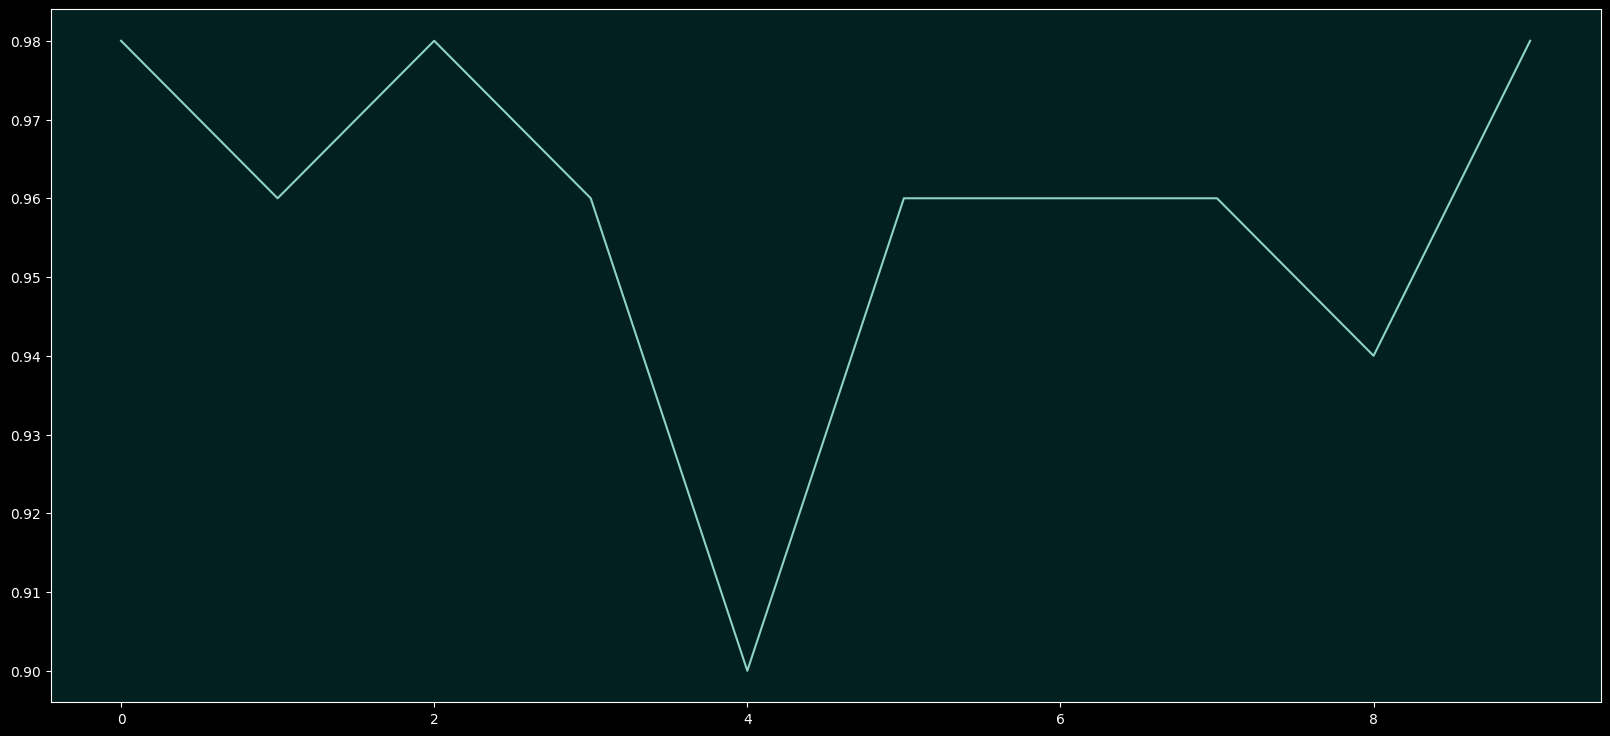

In [31]:
plt.plot(list_accuracy)

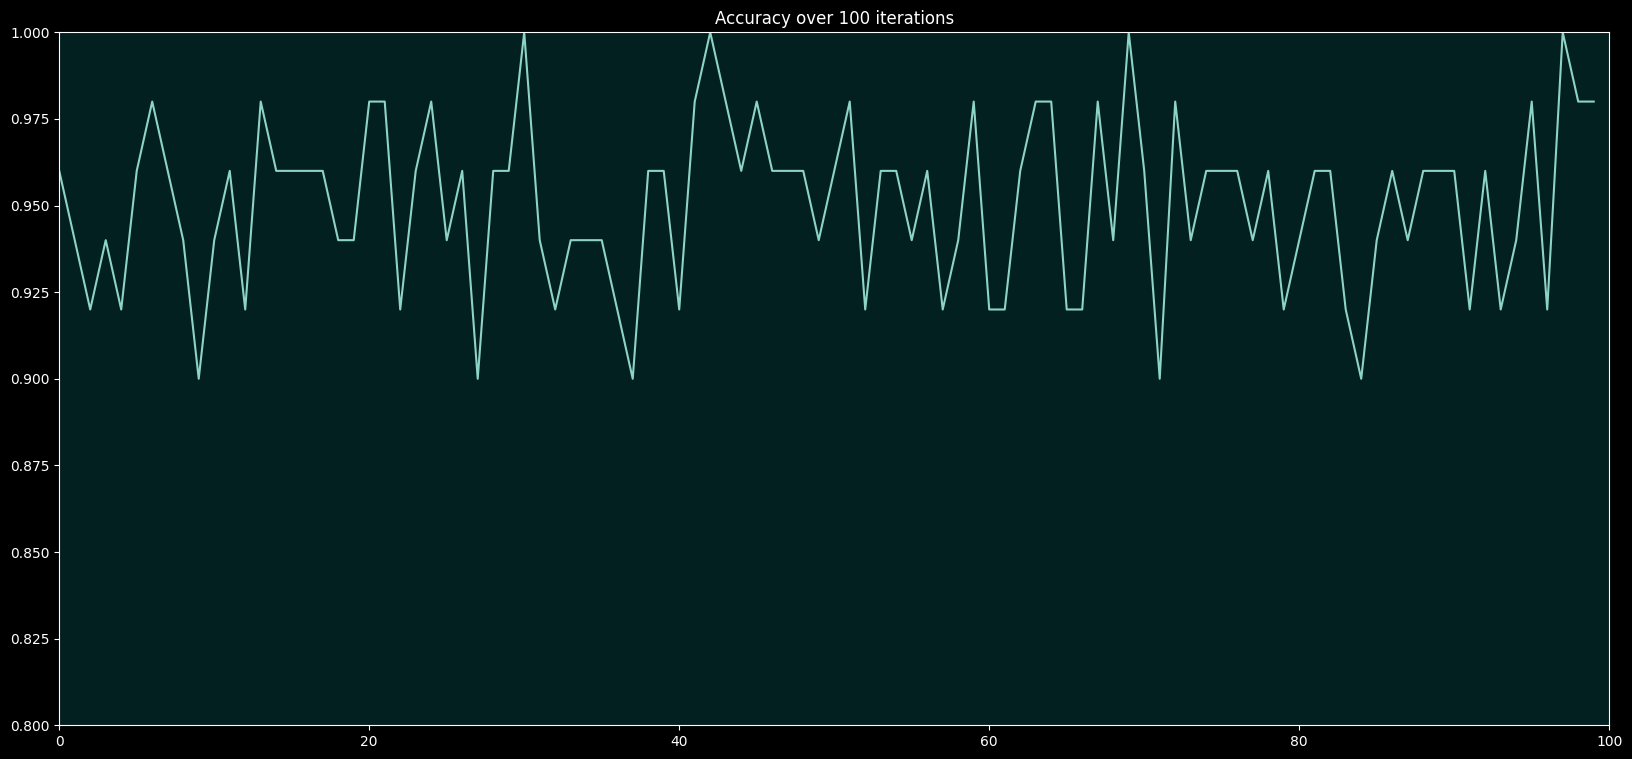

In [33]:
fig, axs = plt.subplots()

axs.set_title('Accuracy over 100 iterations')
plt.plot(list_accuracy)

axs.set_xlabel('')
axs.set_ylabel('')

axs.set(xlim=(0, 100), ylim=(0.8, 1))

plt.show()

In [34]:
np.mean(list_accuracy)

0.9506000000000001